# Identificación de Sal

La sismología mediante reflexión (o reflexión sísmica) es un método de exploración geofísica que usa los principios de la sismología para estimar las propiedades del subsuelo haciendo uso de ondas sísmicas reflejadas. El método requiere una fuente de energía sísmica controlada, como dinamita/Tovex una pistola de aire especial o exitador sísmico, conocida comúnmente por la marca Vibroseis. La sismología mediante reflexión aplica principios similares a los utilizados por el sonar o la ecolocalización.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
# Carga de imgenes
from os import listdir

img_names = listdir('./data/train/images/')
img_names.sort()
images = []
for i in img_names:
    raw = mpimg.imread('./data/train/images/' + i)[:-1,:-1,0]
#     images.append(raw-raw.mean().cumsum(axis=0))
#     noisem = np.random.normal(loc=0.0, scale=1.0,size=(raw.shape))
#     images.append(raw+0.1*noisem)
    images.append(raw)
images = np.asarray(images, dtype='float64')

msk_names = listdir('./data/train/masks/')
msk_names.sort()
masks = []

# print(msk_names)
for i in msk_names:
    raw = mpimg.imread('./data/train/masks/' + i)[:-1,:-1]
    masks.append(raw)
masks = np.asarray(masks, dtype='float64')

A continuación se presentan ejemplos de una imágen original, su máscara en la que se indica con pixel blanco si es un pizel de sal y con uno negro si es sedimento.

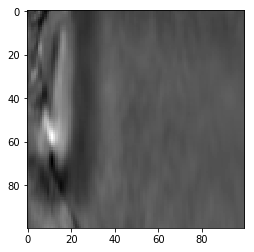

In [4]:
prueba = 16
implot = plt.imshow(images[prueba], cmap=('gray'))

In [5]:
images[prueba]

array([[0.2       , 0.26666668, 0.26666668, ..., 0.28235295, 0.28627452,
        0.27843139],
       [0.21176471, 0.24313726, 0.25490198, ..., 0.28235295, 0.28627452,
        0.28235295],
       [0.24705882, 0.23529412, 0.28235295, ..., 0.28627452, 0.29803923,
        0.28627452],
       ...,
       [0.31764707, 0.36078432, 0.3882353 , ..., 0.34117648, 0.34509805,
        0.34901962],
       [0.31764707, 0.35686275, 0.3764706 , ..., 0.34117648, 0.34509805,
        0.34901962],
       [0.3137255 , 0.34901962, 0.36862746, ..., 0.34117648, 0.34509805,
        0.34901962]])

(array([2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 8.000e+00, 7.000e+00, 1.100e+01, 1.400e+01, 1.400e+01,
        1.400e+01, 1.900e+01, 1.500e+01, 1.700e+01, 1.200e+01, 2.600e+01,
        1.090e+02, 3.900e+01, 2.000e+02, 2.590e+02, 5.200e+01, 1.930e+02,
        1.030e+02, 1.460e+02, 1.400e+02, 2.690e+02, 3.720e+02, 2.510e+02,
        4.700e+02, 9.170e+02, 9.180e+02, 1.152e+03, 1.882e+03, 3.190e+02,
        5.700e+02, 2.170e+02, 3.060e+02, 1.190e+02, 1.160e+02, 8.600e+01,
        3.300e+01, 5.600e+01, 3.200e+01, 5.600e+01, 2.000e+01, 4.700e+01,
        2.500e+01, 4.500e+01, 3.400e+01, 2.600e+01, 2.700e+01, 1.500e+01,
        3.200e+01, 3.300e+01, 2.900e+01, 1.200e+01, 4.000e+00, 1.000e+01,
        7.000e+00, 8.000e+00, 3.000e+00, 7.000e+00, 4.000e+00, 2.000e+00,
        6.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        5.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 3.000e+0

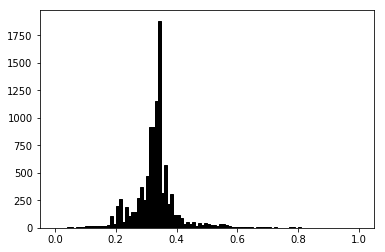

In [6]:
plt.hist(images[prueba].ravel(), bins=100, range=(0.0, 1.0), fc='k', ec='k')

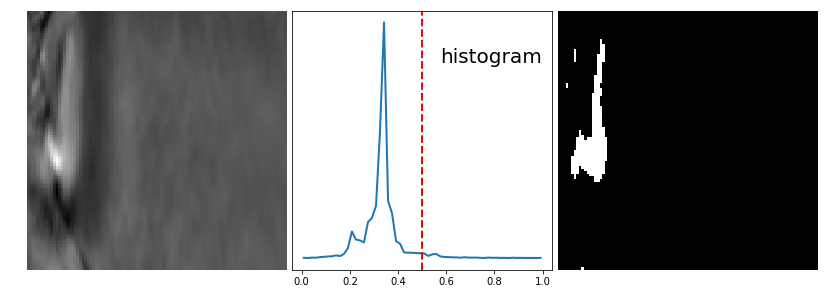

In [7]:
hist, bin_edges = np.histogram(images[prueba], bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = images[prueba] > 0.5

plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(images[prueba], cmap=('gray'))
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()


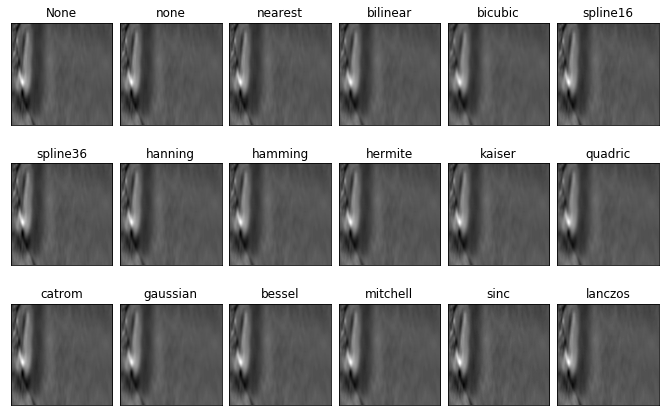

In [8]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = images[prueba]

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9.3, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='gray')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

(array([8.823e+03, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 6.000e+00,
        5.000e+00, 2.000e+00, 8.000e+00, 0.000e+00, 7.000e+00, 5.000e+00,
        8.000e+00, 0.000e+00, 5.000e+00, 8.000e+00, 4.000e+00, 0.000e+00,
        7.000e+00, 3.000e+00, 1.100e+01, 0.000e+00, 4.000e+00, 3.000e+00,
        1.400e+01, 0.000e+00, 1.300e+01, 7.000e+00, 2.200e+01, 0.000e+00,
        8.000e+00, 1.300e+01, 1.700e+01, 0.000e+00, 1.100e+01, 1.600e+01,
        3.800e+01, 0.000e+00, 1.300e+01, 1.600e+01, 1.000e+01, 2.500e+01,
        0.000e+00, 9.000e+00, 1.700e+01, 1.200e+01, 1.300e+01, 1.300e+01,
        1.300e+01, 2.000e+01, 0.000e+00, 1.800e+01, 7.000e+00, 1.900e+01,
        1.200e+01, 1.500e+01, 1.400e+0

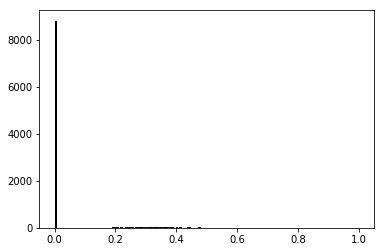

In [9]:
plt.hist((images[prueba]*(masks[prueba] == 0)).ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

In [10]:
masks[prueba]

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

vol_x = np.zeros( (100,100) )
vol_y = np.zeros( (100,100) )
vol_z = np.zeros( (100,100) )
vol_w = np.zeros( (100,100) )

In [12]:
for i in range(0,100):
    for j in range(0,100):
        vol_x[i,j]=j
        vol_y[i,j]=i
        vol_z[i,j]=images[prueba][i,j]
        vol_w[i,j]=masks[prueba][i,j]

In [13]:
vol_x

array([[ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       ...,
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.]])

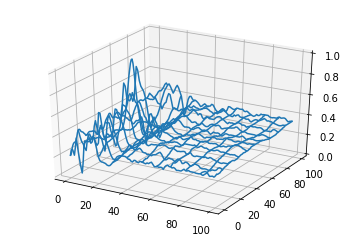

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(vol_x, vol_y, vol_z, rstride=10, cstride=10)
plt.show()

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly
plotly.tools.set_credentials_file(username='ma.orjuela73', api_key='DDaMeYCu4IfTEFLrpbl0')

data = [
   go.Surface(z=vol_z),
   go.Surface(z = vol_w, showscale=False, opacity=0.4)
]

py.iplot(data,filename='multiple-surfaces')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ma.orjuela73/0 or inside your plot.ly account where it is named 'multiple-surfaces'


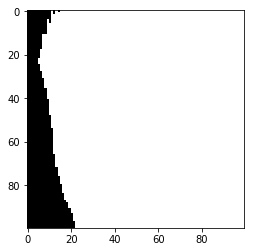

In [19]:
implot = plt.imshow(masks[prueba], cmap=('gray'))

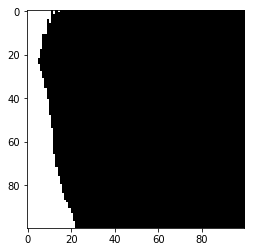

In [20]:
masks[prueba] == 1  
implot = plt.imshow(masks[prueba] == 0, cmap=('gray'))

Se intenta realizar algunas modificaciones a la imágen para mejorar la precisión del modelo

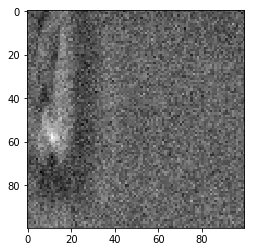

In [21]:
noisem = np.random.normal(loc=0.0, scale=1.0,size=(100,100))
implot = plt.imshow(images[prueba] + 0.1*noisem, cmap=('gray'))

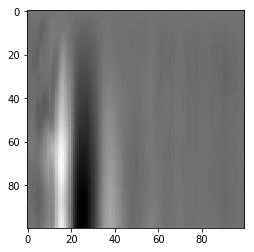

In [22]:
implot = plt.imshow((images[prueba]-images[prueba].mean()).cumsum(axis=0), cmap=('gray'))

In [23]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(images, masks, test_size=0.25, random_state=42)
X_train.shape

(3000, 100, 100)

In [24]:
from keras.preprocessing.image import load_img,img_to_array
from keras import Model
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout

input_layer = Input((100, 100, 1))

convolutional_layer = Conv2D(16, (10,10), activation="relu", padding="same")(input_layer)
convolutional_layer = Conv2D(16, (10,10), activation="relu", padding="same")(convolutional_layer)

pooling_layer = MaxPooling2D((2, 2))(convolutional_layer)
pooling_layer = Dropout(0.1)(pooling_layer)

convolutional_layer2 = Conv2D(32, (5, 5), activation="relu", padding="same")(pooling_layer)
convolutional_layer2 = Conv2D(32, (5, 5), activation="relu", padding="same")(convolutional_layer2)

pooling_layer2 = MaxPooling2D((2, 2))(convolutional_layer2)
pooling_layer2 = Dropout(0.1)(pooling_layer2)

convolutional_middle = Conv2D(64, (5, 5), activation="relu", padding="same")(pooling_layer2)
convolutional_middle = Conv2D(64, (5, 5), activation="relu", padding="same")(convolutional_middle)

deconvolutional_layer = Conv2DTranspose(32, (5, 5), strides=(2, 2), padding="same")(convolutional_middle)
concatenada = concatenate([deconvolutional_layer,convolutional_layer2])
concatenada = Dropout(0.1)(concatenada)
concatenada = Conv2D(32, (3, 3), activation="relu", padding="same")(concatenada)
concatenada = Conv2D(32, (3, 3), activation="relu", padding="same")(concatenada)

deconvolutional_layer2 = Conv2DTranspose(16, (5, 5), strides=(2, 2), padding="same")(concatenada)
concatenada2 = concatenate([deconvolutional_layer2,convolutional_layer])
concatenada2 = Dropout(0.1)(concatenada2)
concatenada2 = Conv2D(16, (3, 3), activation="relu", padding="same")(concatenada2)
concatenada2 = Conv2D(16, (3, 3), activation="relu", padding="same")(concatenada2)

output_layer = Conv2D(1, (1,1), padding="same", activation="hard_sigmoid")(concatenada2)

model = Model(input_layer, output_layer)
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

C:\Users\maorj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 100, 100, 16) 1616        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 100, 100, 16) 25616       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 50, 50, 16)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
dropout_1 

In [25]:
epochs = 10
batch_size = 50

X_train2 = X_train.reshape(len(X_train), 100, 100, 1)
X_test2 = X_test.reshape(len(X_test), 100, 100, 1)
y_train2 = X_train.reshape(len(X_train), 100, 100, 1)
y_test2 = X_test.reshape(len(X_test), 100, 100, 1)
print(X_train.shape)

history = model.fit(X_train2, y_train2,
                    validation_data=[X_test2, y_test2], 
                    epochs=epochs,
                    batch_size=batch_size)

(3000, 100, 100)
Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 22s 7ms/step - loss: 0.6635 - acc: 0.0209 - val_loss: 0.6426 - val_acc: 0.0202
Epoch 2/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.6390 - acc: 0.0209 - val_loss: 0.6387 - val_acc: 0.0202
Epoch 3/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.6369 - acc: 0.0209 - val_loss: 0.6384 - val_acc: 0.0202
Epoch 4/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.6365 - acc: 0.0209 - val_loss: 0.6375 - val_acc: 0.0202
Epoch 5/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.6356 - acc: 0.0209 - val_loss: 0.6372 - val_acc: 0.0202
Epoch 6/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.6353 - acc: 0.0209 - val_loss: 0.6409 - val_acc: 0.0202
Epoch 7/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.6675 - acc: 0.0208 - val_loss: 0.7576 - val_ac

In [26]:
score, acc = model.evaluate(X_test2, y_test2, verbose = 1)
print(score)
print(acc)

1000/1000 [==============================] - 2s 2ms/step
0.6381011333465576
0.020244499750435352


In [27]:
preds_valid = model.predict(X_train2).reshape(-1, 100, 100)
preds_valid.shape

(3000, 100, 100)

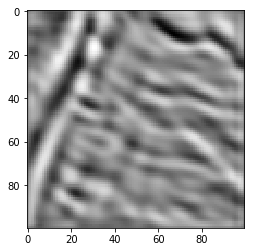

In [28]:
implot = plt.imshow(preds_valid[prueba], cmap=('gray'))